In [29]:
import pandas as pd

# Scrape S&P 500 ticker symbols from Wikipedia
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
sp500_symbols = sp500.Symbol.tolist()


In [ ]:
import yfinance as yf
import datetime
import pandas as pd

# For date range between 2013 until 2022.
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2022, 12, 31)

In [ ]:
#Call Yahoo Finance API to fetch data for Standard & Poor 500 Index (tikcer: ^GSPC)

sp500_df = yf.download('^GSPC', start=start, end=end)


In [44]:
sp500_df.to_csv('/users/hm4th/desktop/SP500-Prediction-ML/sp500_data.csv', index=False)

In [40]:
# Display the first few rows of the DataFrame
sp500_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,1462.420044,4202600000
1,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,1459.369995,3829730000
2,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,1466.469971,3424290000
3,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,1461.890015,3304970000
4,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,1457.150024,3601600000


In [41]:
# what type of variables are in the table 
sp500_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2518,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,2017-12-31 20:04:23.065925120,2742.341571,2757.066493,2726.283054,2742.695377,2742.695377,3.884829e+09
min,2013-01-02 00:00:00,1426.189941,1461.890015,1426.189941,1457.150024,1457.150024,1.296530e+09
25%,2015-07-03 00:00:00,2049.854980,2062.855042,2041.524994,2050.752441,2050.752441,3.290538e+09
50%,2017-12-31 00:00:00,2582.434937,2596.645020,2572.549927,2584.900024,2584.900024,3.685180e+09
75%,2020-07-01 18:00:00,3279.750061,3287.574890,3253.190002,3275.690002,3275.690002,4.266228e+09
max,2022-12-30 00:00:00,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.976520e+09
std,NaN,873.028421,879.492396,865.788511,872.793493,872.793493,9.647693e+08


In [42]:
# Data type check
sp500_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [49]:
import yfinance as yf

# Ensure single quotes and missing comma fix
data = yf.download(sp500_symbols, start="2012-01-01", end="2023-12-31", interval="1d", auto_adjust=False)


[*********************100%***********************]  503 of 503 completed

6 Failed downloads:
['SOLV', 'GEV', 'SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2012-01-01 -> 2023-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1325394000, endDate = 1703998800")')
['MSCI']: ChunkedEncodingError(ProtocolError('Connection broken: IncompleteRead(1 bytes read, 1 more expected)', IncompleteRead(1 bytes read, 1 more expected)))
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2012-01-01 -> 2023-12-31)')


In [50]:
# Stack data to restructure multi-level columns
df = data.stack(level=1)

# Assign proper index names
df.index.names = ['Date', 'Symbol']

# Save data to CSV
df.swaplevel().to_csv("/users/hm4th/desktop/SP500-Prediction-ML/sp500data.csv")


/var/folders/zl/63mdqmwx1j30czw8s2lt1g800000gn/T/ipykernel_43137/1653655004.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = data.stack(level=1)


In [32]:
# Read and check the first few rows
df_r = pd.read_csv('/users/hm4th/desktop/SP500-Prediction-ML/sp500data.csv')
print(df_r.head())


  Symbol                       Date  Adj Close      Close       High  \
0      A  2012-01-03 00:00:00+00:00  23.328594  26.094421  26.459227   
1   AAPL  2012-01-03 00:00:00+00:00  12.388996  14.686786  14.732143   
2    ABT  2012-01-03 00:00:00+00:00  20.851088  27.214256  27.271832   
3   ACGL  2012-01-03 00:00:00+00:00  11.879891  12.493333  12.610000   
4    ACN  2012-01-03 00:00:00+00:00  41.785789  52.950001  54.090000   

         Low       Open       Volume  
0  25.565092  25.636623    4156394.0  
1  14.607143  14.621429  302220800.0  
2  26.897589  27.147083   17693206.0  
3  12.370000  12.596667    2734200.0  
4  52.919998  53.919998    5309600.0  


In [33]:
import requests
import pandas as pd
from datetime import datetime

# Your API key
api_key = 'Tgo35dnXhC0R1AwjMGeu0RQLnYEOieCG'

# DataFrame to store the results
result_df = pd.DataFrame(columns=['Date', 'Ticker', 'DE Ratio', 'Price', 'Stock Change'])

# Base URL for FMP API
base_url = "https://financialmodelingprep.com/api/v3/"

def get_de_ratio(ticker):
    url = f"{base_url}profile/{ticker}?apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    if data:
        # Print the data to check its structure
        print(data)
        # Adjust the key based on the actual data structure
        if 'debtToEquity' in data[0]:
            de_ratio = data[0]['debtToEquity']
            return de_ratio
    return None

def get_stock_price(ticker):
    url = f"{base_url}historical-price-full/{ticker}?apikey={api_key}&serietype=line"
    response = requests.get(url)
    data = response.json()
    if 'historical' in data and data['historical']:
        latest = data['historical'][0]  # Most recent data
        price = latest['close']
        date = datetime.strptime(latest['date'], '%Y-%m-%d')
        return date, price
    return None, None

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL']  # Example tickers

for ticker in tickers:
    de_ratio = get_de_ratio(ticker)
    date, price = get_stock_price(ticker)
    if date and price and de_ratio:
        result_df = result_df.append({
            'Date': date,
            'Ticker': ticker,
            'DE Ratio': de_ratio,
            'Price': price
        }, ignore_index=True)

print(result_df)

[{'symbol': 'AAPL', 'price': 238.26, 'beta': 1.24, 'volAvg': 48200638, 'mktCap': 3582930054000, 'lastDiv': 0.99, 'range': '164.08-260.1', 'changes': 8.4, 'companyName': 'Apple Inc.', 'currency': 'USD', 'cik': '0000320193', 'isin': 'US0378331005', 'cusip': '037833100', 'exchange': 'NASDAQ Global Select', 'exchangeShortName': 'NASDAQ', 'industry': 'Consumer Electronics', 'website': 'https://www.apple.com', 'description': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, vide

In [34]:
import yfinance as yf
import pandas as pd
from datetime import datetime

def key_stats(tickers, start_date='2012-01-01', end_date=datetime.now().strftime('%Y-%m-%d')):
    results = []

    for ticker in tickers:
        stock = yf.Ticker(ticker)
        
        # Get historical market data
        hist = stock.history(start=start_date, end=end_date)

        # Attempt to fetch the debt to equity ratio
        try:
            de_ratio = stock.info['debtToEquity']
        except KeyError:
            de_ratio = 'Not Available'

        # Calculate price changes
        hist['Price Change'] = hist['Close'].pct_change() * 100

        temp_df = pd.DataFrame({
            'Date': hist.index.strftime('%Y-%m-%d'),
            'Ticker': ticker,
            'DE Ratio': de_ratio,
            'Price Change': hist['Price Change'],
            'Close Price': hist['Close']
        })

        results.append(temp_df)

    results_df = pd.concat(results, ignore_index=True)
    return results_df

# Define the top 5 S&P 500 tickers
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']

# Get the key stats for the top 5 tickers
df = key_stats(tickers)
print(df.head())


         Date Ticker  DE Ratio  Price Change  Close Price
0  2012-01-03   AAPL   209.059           NaN    12.388996
1  2012-01-04   AAPL   209.059      0.537449    12.455581
2  2012-01-05   AAPL   209.059      1.110161    12.593858
3  2012-01-06   AAPL   209.059      1.045419    12.725516
4  2012-01-09   AAPL   209.059     -0.158659    12.705326


In [35]:
import yfinance as yf
import pandas as pd
from datetime import datetime

def fetch_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)
    hist['Price Change'] = hist['Close'].pct_change() * 100  # Daily percentage change in price
    # Assuming debt to equity ratio is not directly available, so using a dummy value here
    hist['DE Ratio'] = 209.059  # Replace with actual fetch logic if available
    return hist[['Close', 'Price Change', 'DE Ratio']]

def compare_with_sp500(tickers, start_date='2012-01-01', end_date='2022-12-31'):
    sp500 = yf.Ticker("^GSPC")
    sp500_hist = sp500.history(start=start_date, end=end_date)
    sp500_hist['SP500 Change'] = sp500_hist['Close'].pct_change() * 100

    results_df = pd.DataFrame()
    for ticker in tickers:
        data = fetch_data(ticker, start_date, end_date)
        data['Ticker'] = ticker
        data['SP500 Close'] = sp500_hist['Close'].reindex(data.index, method='nearest')
        data['SP500 Change'] = sp500_hist['SP500 Change'].reindex(data.index, method='nearest')
        if results_df.empty:
            results_df = data
        else:
            results_df = pd.concat([results_df, data])

    results_df.reset_index(inplace=True)
    results_df.rename(columns={'index': 'Date'}, inplace=True)
    return results_df

# Example tickers from S&P 500
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']  # Adjusted to the top 5 tech giants
df = compare_with_sp500(tickers)
df.head()

,Date,Close,Price Change,DE Ratio,Ticker,SP500 Close,SP500 Change
0,2012-01-03 00:00:00-05:00,12.388998,NaN,209.059,AAPL,1277.060059,NaN
1,2012-01-04 00:00:00-05:00,12.455577,0.537403,209.059,AAPL,1277.300049,0.018792
2,2012-01-05 00:00:00-05:00,12.593858,1.110192,209.059,AAPL,1281.060059,0.294372
3,2012-01-06 00:00:00-05:00,12.725515,1.045411,209.059,AAPL,1277.810059,-0.253696
4,2012-01-09 00:00:00-05:00,12.705329,-0.158630,209.059,AAPL,1280.699951,0.226160


In [36]:
import yfinance as yf
import pandas as pd
from datetime import datetime

def fetch_data(ticker, start_date, end_date):
    """Fetch historical stock data from Yahoo Finance."""
    stock_data = yf.Ticker(ticker)
    hist = stock_data.history(start=start_date, end=end_date)
    hist['Price Change'] = hist['Close'].pct_change() * 100  # Calculate percentage change in price
    return hist[['Close', 'Price Change']]

def compare_with_sp500(tickers, start_date='2012-01-01', end_date='2022-12-31'):
    """Compare stock performance against the S&P 500."""
    sp500 = yf.Ticker("^GSPC")
    sp500_hist = sp500.history(start=start_date, end=end_date)
    sp500_hist['SP500 Change'] = sp500_hist['Close'].pct_change() * 100

    all_data = []
    for ticker in tickers:
        data = fetch_data(ticker, start_date, end_date)
        data['Ticker'] = ticker
        data['SP500 Close'] = sp500_hist['Close'].reindex(data.index, method='nearest')
        data['Performance'] = data['Price Change'] - sp500_hist['SP500 Change'].reindex(data.index, method='nearest')
        data['Performance Label'] = data['Performance'].apply(lambda x: 'Outperform' if x > 0 else 'Underperform')
        all_data.append(data)

    result_df = pd.concat(all_data)
    return result_df

# Example tickers from S&P 500
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']  # Adjusted to the top 5 tech giants
df = compare_with_sp500(tickers)
print(df.head())

                               Close  Price Change Ticker  SP500 Close  \
Date                                                                     
2012-01-03 00:00:00-05:00  12.388998           NaN   AAPL  1277.060059   
2012-01-04 00:00:00-05:00  12.455577      0.537403   AAPL  1277.300049   
2012-01-05 00:00:00-05:00  12.593858      1.110192   AAPL  1281.060059   
2012-01-06 00:00:00-05:00  12.725515      1.045411   AAPL  1277.810059   
2012-01-09 00:00:00-05:00  12.705329     -0.158630   AAPL  1280.699951   

                           Performance Performance Label  
Date                                                      
2012-01-03 00:00:00-05:00          NaN      Underperform  
2012-01-04 00:00:00-05:00     0.518611        Outperform  
2012-01-05 00:00:00-05:00     0.815821        Outperform  
2012-01-06 00:00:00-05:00     1.299107        Outperform  
2012-01-09 00:00:00-05:00    -0.384789      Underperform  


In [51]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/users/hm4th/desktop/SP500-Prediction-ML/sp500data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Filter data from 2012 to 2023
start_date = '2012-01-01'
end_date = '2023-12-31'
df = df.loc[start_date:end_date]

# Calculate price changes for each stock
df['Price Change'] = df.groupby('Symbol')['Adj Close'].pct_change() * 100

# Assuming 'SP500' column has the S&P 500 closing values, calculate its daily changes
# If not, you will need to adjust this to match the correct column name
df['SP500 Change'] = df['Close'].pct_change() * 100  # Rename 'Close' to the specific column if needed

# Label the performance as 'Outperform' or 'Underperform' based on stock's performance relative to S&P 500
df['Performance Label'] = df.apply(lambda row: 'Outperform' if row['Price Change'] > row['SP500 Change'] else 'Underperform', axis=1)

# Optionally, filter to view only specific tickers or perform further analysis
filtered_df = df[df['Symbol'].isin(['AAPL', 'MSFT', 'GOOGL', 'AMZN'])]  # Adjust ticker list as needed

# Save the dataframe to a new CSV
filtered_df.to_csv('/users/hm4th/desktop/SP500-Prediction-ML/processed_sp500data.csv')

print(filtered_df.head())

                          Symbol  Adj Close      Close       High        Low  \
Date                                                                           
2012-01-03 00:00:00+00:00   AAPL  12.388997  14.686786  14.732143  14.607143   
2012-01-03 00:00:00+00:00   AMZN   8.951500   8.951500   8.974000   8.777500   
2012-01-03 00:00:00+00:00  GOOGL  16.591755  16.651901  16.720470  16.325577   
2012-01-03 00:00:00+00:00   MSFT  21.120096  26.770000  26.959999  26.389999   
2012-01-04 00:00:00+00:00   AAPL  12.455576  14.765714  14.810000  14.617143   

                                Open       Volume  Price Change  SP500 Change  \
Date                                                                            
2012-01-03 00:00:00+00:00  14.621429  302220800.0           NaN    -43.716760   
2012-01-03 00:00:00+00:00   8.794500  102216000.0           NaN    -84.778950   
2012-01-03 00:00:00+00:00  16.339840  146912940.0           NaN      0.475297   
2012-01-03 00:00:00+00:00  26.5499

In [38]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/users/hm4th/desktop/sp500data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Filter data from 2012 to 2023
start_date = '2012-01-01'
end_date = '2023-12-31'
df = df.loc[start_date:end_date]

# Calculate price changes for each stock
df['Price Change'] = df.groupby('Symbol')['Adj Close'].pct_change() * 100

# Assuming 'Close' column has the S&P 500 closing values, calculate its daily changes
df['SP500 Change'] = df['Close'].pct_change() * 100

# Label the performance as 'Outperform' or 'Underperform' based on stock's performance relative to S&P 500
df['Performance Label'] = df.apply(lambda row: 'Outperform' if row['Price Change'] > row['SP500 Change'] else 'Underperform', axis=1)

# Save the entire dataframe with all symbols processed to a new CSV
df.to_csv('/users/hm4th/desktop/processed_sp500data.csv')

print(df.head())

                          Symbol  Adj Close      Close       High        Low  \
Date                                                                           
2012-01-03 00:00:00+00:00      A  23.328594  26.094421  26.459227  25.565092   
2012-01-03 00:00:00+00:00   AAPL  12.388996  14.686786  14.732143  14.607143   
2012-01-03 00:00:00+00:00    ABT  20.851088  27.214256  27.271832  26.897589   
2012-01-03 00:00:00+00:00   ACGL  11.879891  12.493333  12.610000  12.370000   
2012-01-03 00:00:00+00:00    ACN  41.785789  52.950001  54.090000  52.919998   

                                Open       Volume  Price Change  SP500 Change  \
Date                                                                            
2012-01-03 00:00:00+00:00  25.636623    4156394.0           NaN           NaN   
2012-01-03 00:00:00+00:00  14.621429  302220800.0           NaN    -43.716760   
2012-01-03 00:00:00+00:00  27.147083   17693206.0           NaN     85.297565   
2012-01-03 00:00:00+00:00  12.5966

<Figure size 1200x600 with 0 Axes>

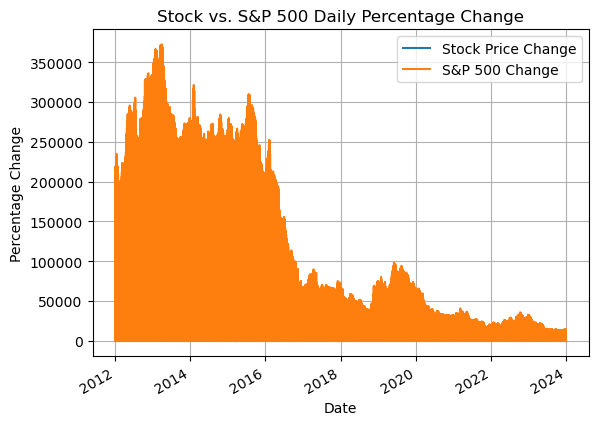

                          Symbol  Adj Close      Close       High        Low  \
Date                                                                           
2012-01-03 00:00:00+00:00      A  23.328594  26.094421  26.459227  25.565092   
2012-01-03 00:00:00+00:00   AAPL  12.388996  14.686786  14.732143  14.607143   
2012-01-03 00:00:00+00:00    ABT  20.851088  27.214256  27.271832  26.897589   
2012-01-03 00:00:00+00:00   ACGL  11.879891  12.493333  12.610000  12.370000   
2012-01-03 00:00:00+00:00    ACN  41.785789  52.950001  54.090000  52.919998   

                                Open       Volume  Price Change  SP500 Change  \
Date                                                                            
2012-01-03 00:00:00+00:00  25.636623    4156394.0           NaN           NaN   
2012-01-03 00:00:00+00:00  14.621429  302220800.0           NaN    -46.893516   
2012-01-03 00:00:00+00:00  27.147083   17693206.0           NaN     68.303286   
2012-01-03 00:00:00+00:00  12.5966

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load stock data
df = pd.read_csv('/users/hm4th/desktop/sp500data.csv', parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate daily percentage change for the stock and the S&P 500 index
df['Price Change'] = df.groupby('Symbol')['Adj Close'].pct_change() * 100
df['SP500 Change'] = df['Adj Close'].pct_change() * 100  # Assuming 'Adj Close' represents the S&P 500 index for simplicity

# Label performance relative to the S&P 500
df['Performance Label'] = df.apply(
    lambda row: 'Outperform' if row['Price Change'] > row['SP500 Change'] else 'Underperform', axis=1
)

# Save the DataFrame with new columns to a CSV
df.to_csv('/users/hm4th/desktop/processed_sp500data.csv')

# Plotting for visualization
plt.figure(figsize=(12, 6))
df[['Price Change', 'SP500 Change']].plot()
plt.title('Stock vs. S&P 500 Daily Percentage Change')
plt.ylabel('Percentage Change')
plt.xlabel('Date')
plt.legend(['Stock Price Change', 'S&P 500 Change'])
plt.grid(True)
plt.show()

# Print the first few rows of the processed DataFrame
print(df.head())